# Regression Intuition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
from mpl_toolkits import mplot3d

In [2]:
X, y = make_regression(n_features=1,noise=50,random_state=42,bias=100)

In [3]:
df = pd.DataFrame(np.hstack((X,y.reshape(-1,1))),columns=['x1','y'])

In [4]:
df['x0'] = 1

In [5]:
df.head()

,x1,y,x0
0,0.931280,198.409020,1
1,0.087047,35.139888,1
2,-1.057711,102.008112,1
3,0.314247,100.165597,1
4,-0.479174,91.313154,1


In [6]:
def plot_regression(x,y,y_hat,figsize=(12,5)):
    fig, ax = plt.subplots(1,2,figsize=figsize)
    
    ax[0].scatter(x, y, label='original')
    ax[0].plot(x, y_hat, 'k.', label='predicted')
    
    ax[1].plot(y, label='original')
    ax[1].plot(y_hat, label='predicted')
    
    plt.legend()

## Fitting a linear regression model

### revisiting psuedo inverse 

\begin{align}
    X \theta = Y\\
    \theta = X^{-1} Y
\end{align}

theta : [105.8255766  55.2214487]


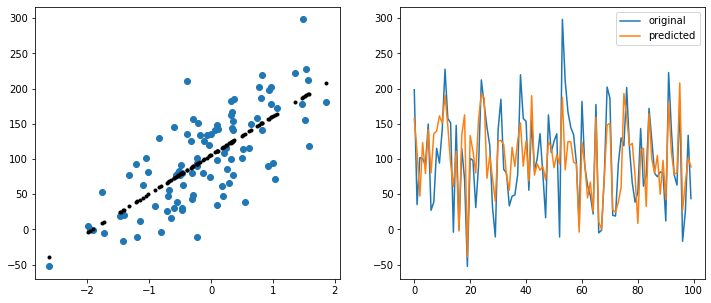

In [7]:
theta = np.linalg.pinv(df[['x0','x1']].values) @ df.y.values
print("theta :",theta)


y_hat = df[['x0','x1']].values @ theta

plot_regression(df.x1,df.y, y_hat)

### revisiting svd and linear systems

theta : [105.8255766  55.2214487]


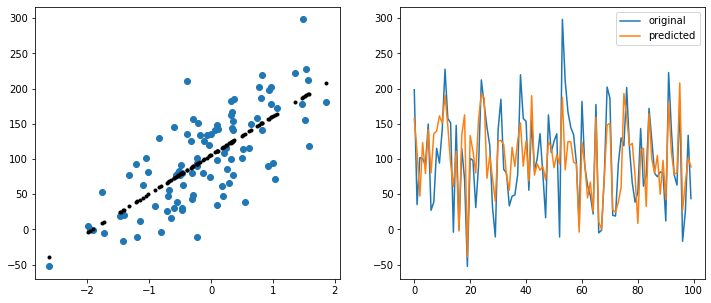

In [8]:
u,s,vT = np.linalg.svd(df[['x0','x1']].values,full_matrices=False) 

theta = vT.T @ np.linalg.pinv(np.diag(s)) @ u.T @ df.y

print("theta :",theta)


y_hat = df[['x0','x1']].values @ theta
plot_regression(df.x1,df.y, y_hat)

### good old sklearn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model = model.fit(df[['x0','x1']].values,df.y.values)

In [11]:
y_hat = model.predict(df[['x0','x1']].values)

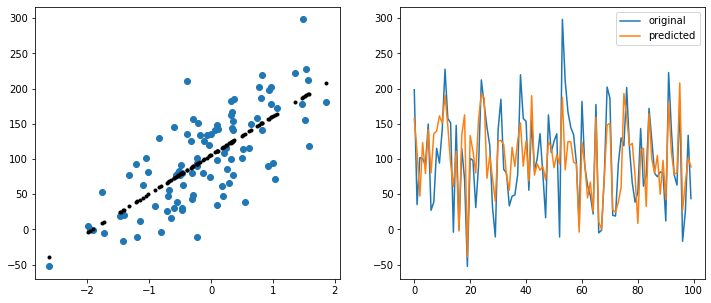

In [12]:
plot_regression(df.x1,df.y, y_hat)

## lets try something with Neural Networks

In [13]:
import tensorflow as tf

### A neural net like perceptron

In [14]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df[['x0','x1']].values) # adapt is like fit

In [15]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                5         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 8
Trainable params: 3
Non-trainable params: 5
_________________________________________________________________


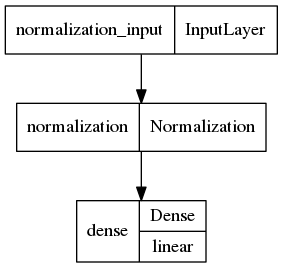

In [17]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

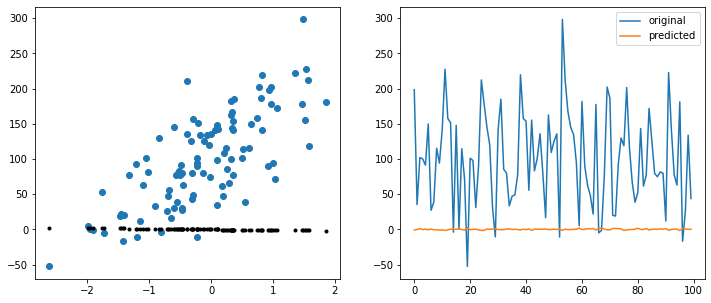

In [18]:
y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

it is not trained yet. so result is understandable.

In [19]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

In [20]:
history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=1000,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

In [21]:
history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

In [22]:
history_metrics.head()

,loss,mse,val_loss,val_mse,epochs
0,15196.099609,15196.099609,11840.739258,11840.739258,0
1,15133.484375,15133.484375,11792.020508,11792.020508,1
2,15067.820312,15067.820312,11743.422852,11743.422852,2
3,15009.005859,15009.005859,11694.437500,11694.437500,3
4,14945.154297,14945.154297,11645.763672,11645.763672,4


<AxesSubplot:xlabel='epochs'>

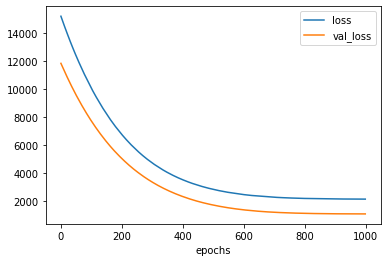

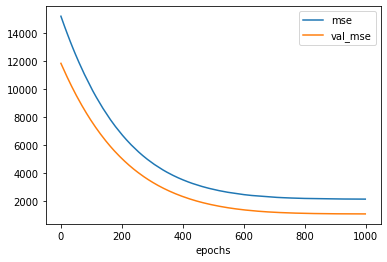

In [23]:
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

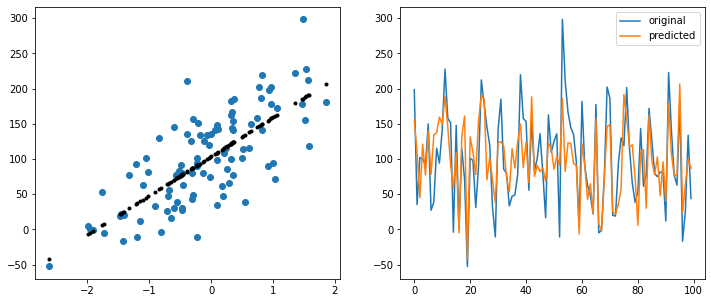

In [24]:
y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

### A little bit deep neural net but no activation functions

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                5         
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 5)                 15        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


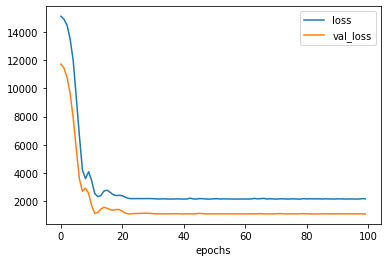

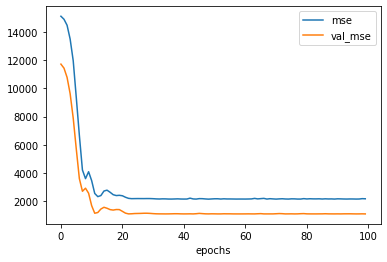

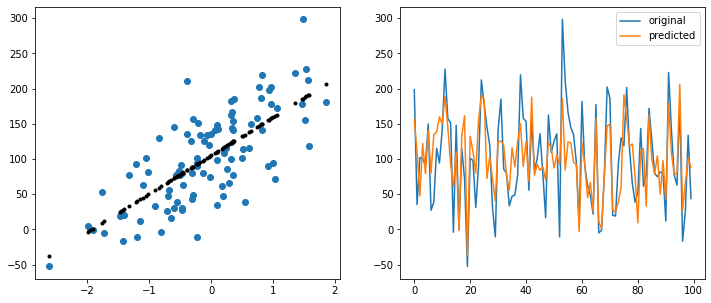

In [25]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch

history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

So I didn't introduce any activation/ non-linearity, and it is, no matter how deep the network is, a linear regression model.
Ha Ha Ha

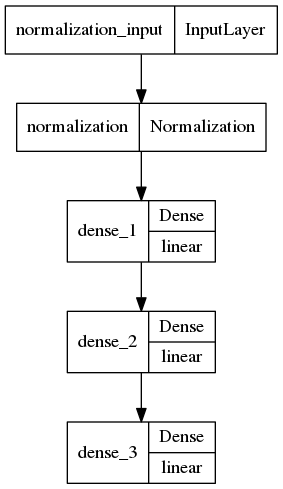

In [26]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

### now a neural net with sigmoid applied

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                5         
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 5)                 15        
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


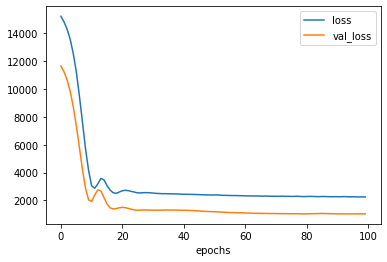

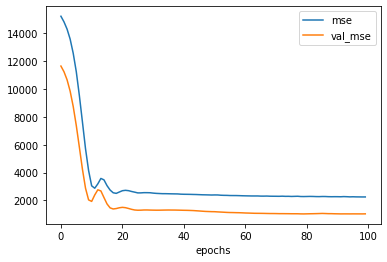

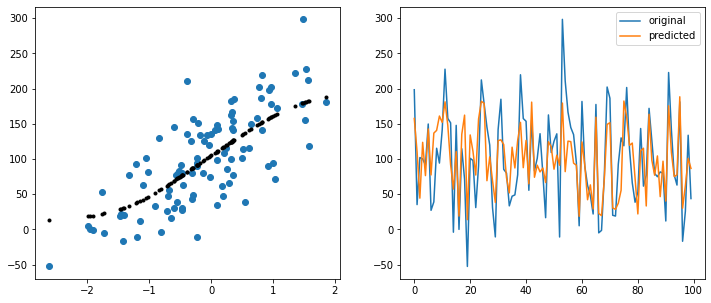

In [27]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5,activation='sigmoid'),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

A little bit curved from sigmoid, trying to fit the pattern.

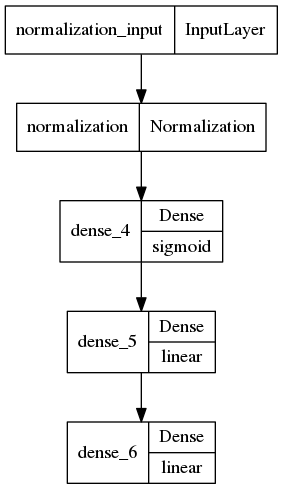

In [28]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

### 2 sigmoids applied in the net

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 2)                5         
 n)                                                              
                                                                 
 dense_7 (Dense)             (None, 5)                 15        
                                                                 
 dense_8 (Dense)             (None, 5)                 30        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


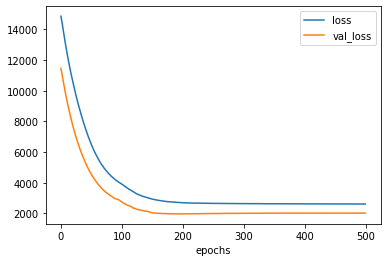

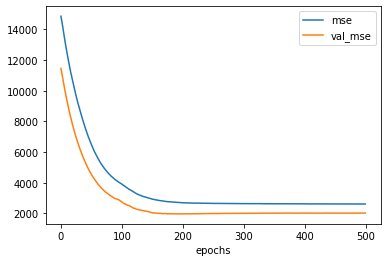

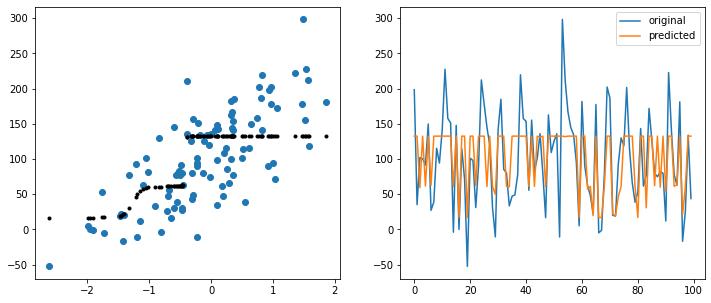

In [29]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5,activation='sigmoid'),
    tf.keras.layers.Dense(units=5,activation='sigmoid'),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=500,
    batch_size=45,
    verbose=0,
    validation_split = 0.2)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

more curves/ non-linear pattern matching, with increasing sigmoid layers.

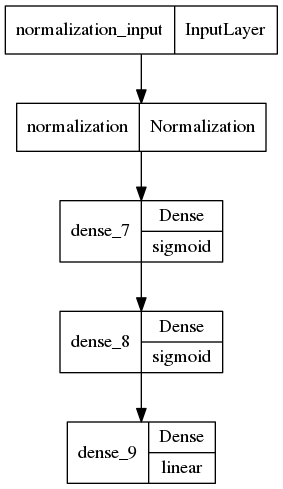

In [30]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

## lets try with a little bit complex pattern

In [31]:
X, y = make_regression(n_features=1,noise=50,random_state=42,bias=100,n_samples=500)

df = pd.DataFrame()
df['x1'] = X[...,-1]**3
df['y'] = y
df['x0'] = 1
df.head()

,x1,y,x0
0,-0.528099,71.818726,1
1,0.000913,97.978984,1
2,0.105983,113.033158,1
3,-3.232089,-31.667239,1
4,-0.057206,81.804313,1


<AxesSubplot:xlabel='x1', ylabel='y'>

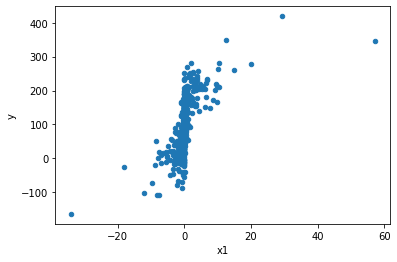

In [32]:
df.plot(x='x1',y='y',kind='scatter')

### a completely linear model for complex data

In [33]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df[['x0','x1']].values) # adapt is like fit

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_10 (Dense)            (None, 5)                 15        
                                                                 
 dense_11 (Dense)            (None, 5)                 30        
                                                                 
 dense_12 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


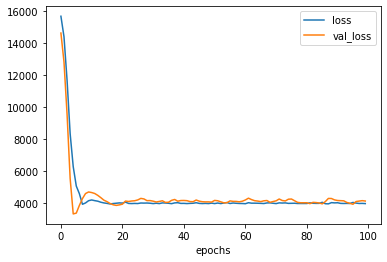

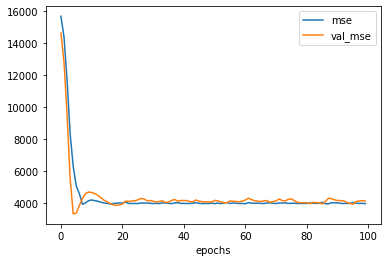

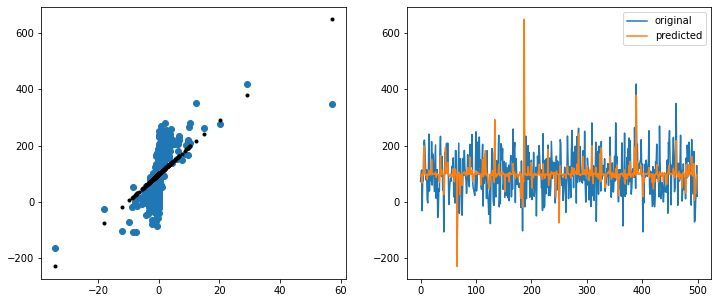

In [34]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=150,
    verbose=0,
    validation_split = 0.2
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

As expected, no matter how deep it is, it matches a linear pattern.

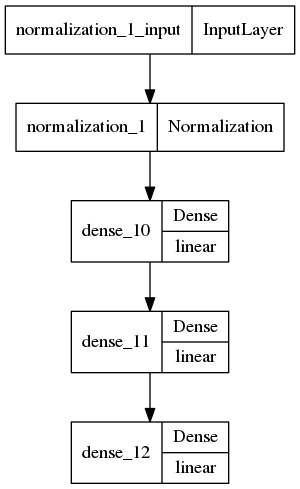

In [35]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

### with a sigmoid introducing non linearity

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_13 (Dense)            (None, 5)                 15        
                                                                 
 dense_14 (Dense)            (None, 5)                 30        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


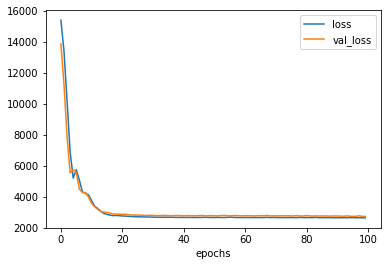

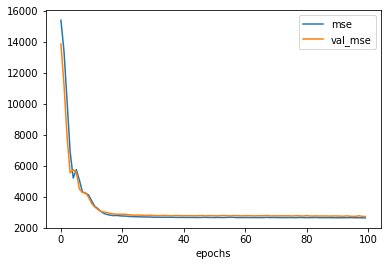

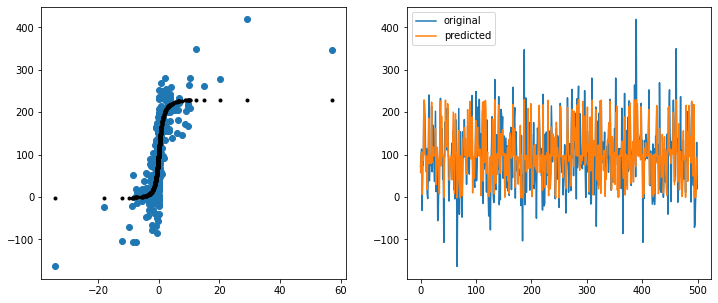

In [36]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5, activation='sigmoid'),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=100,
    verbose=0,
    validation_split = 0.2
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

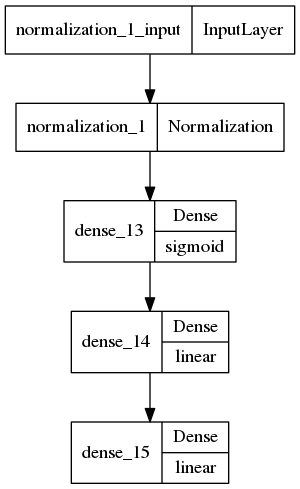

In [37]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

### with a relu layer

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_16 (Dense)            (None, 5)                 15        
                                                                 
 dense_17 (Dense)            (None, 5)                 30        
                                                                 
 dense_18 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


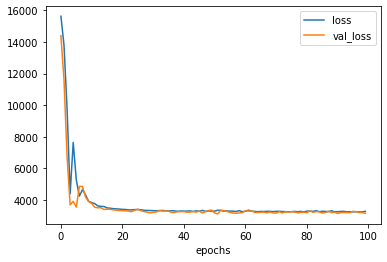

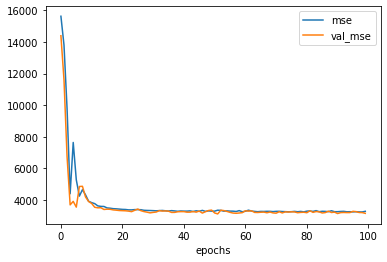

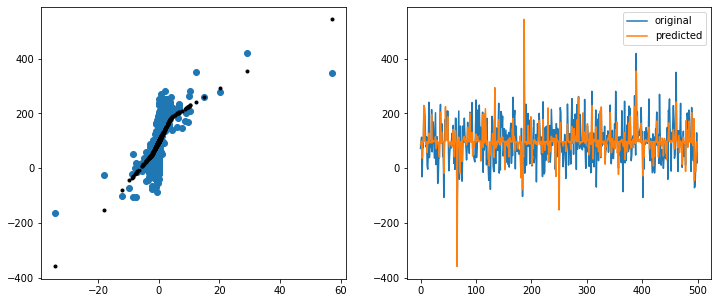

In [38]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(units=5),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=100,
    verbose=0,
    validation_split = 0.2
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

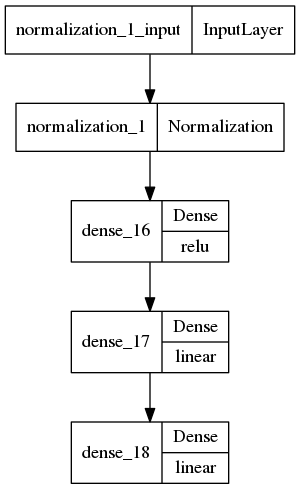

In [39]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

### with two relu layers

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_19 (Dense)            (None, 5)                 15        
                                                                 
 dense_20 (Dense)            (None, 5)                 30        
                                                                 
 dense_21 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


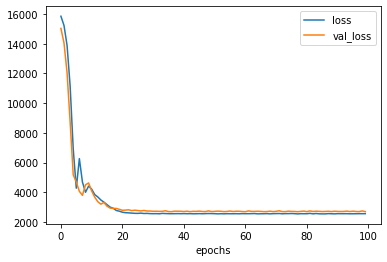

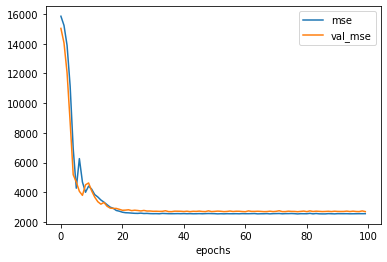

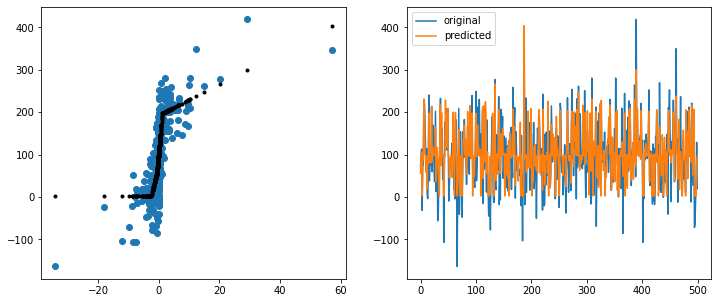

In [40]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(
    df[['x0','x1']],
    df.y,
    epochs=100,
    batch_size=100,
    verbose=0,
    validation_split = 0.2
)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

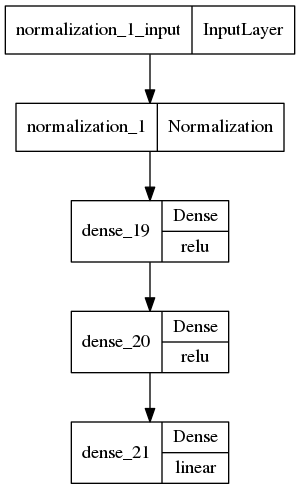

In [41]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

## sine wave with a nerual network

In [42]:
X, y = make_regression(n_features=1,noise=10,random_state=42,n_samples=500)

X.shape, y.shape

((500, 1), (500,))

<AxesSubplot:xlabel='x1', ylabel='y'>

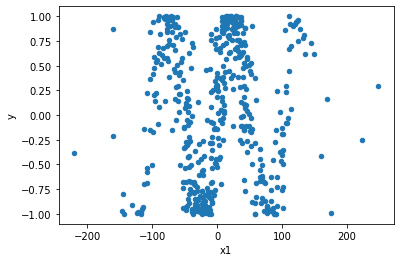

In [43]:
df = pd.DataFrame()
df['x1'] = y
df['y'] = np.sin(X[...,-1]*4)
df['x0'] = 1
df.plot(x='x1',y='y',kind='scatter')

### Trying out with linear model


I know this is not gonna work.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_22 (Dense)            (None, 5)                 15        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 21
Non-trainable params: 5
_________________________________________________________________


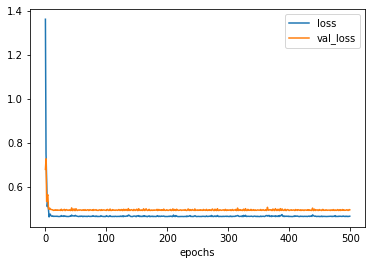

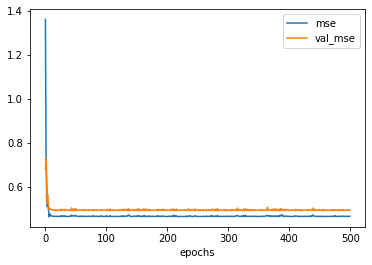

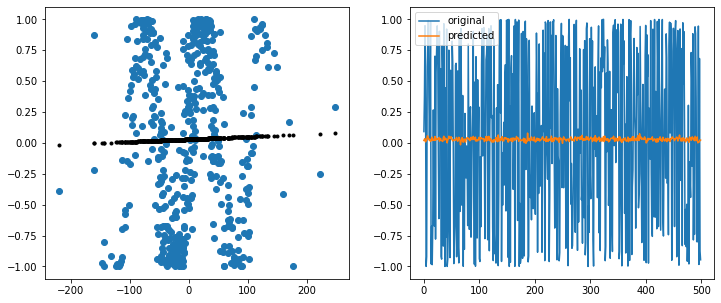

In [44]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df[['x0','x1']].values) # adapt is like fit

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5, activation='linear'),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(df[['x0','x1']], df.y, epochs=500, \
                    batch_size=100, verbose=0, validation_split = 0.2)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

Pretty obvious.

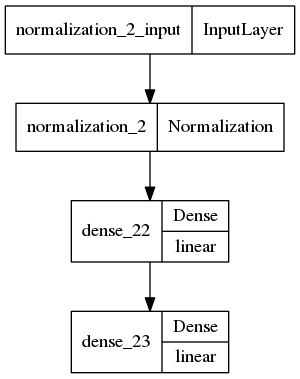

In [45]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

### Now with 2 sigmoid layers

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_24 (Dense)            (None, 5)                 15        
                                                                 
 dense_25 (Dense)            (None, 5)                 30        
                                                                 
 dense_26 (Dense)            (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 51
Non-trainable params: 5
_________________________________________________________________


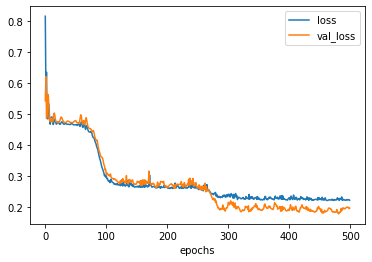

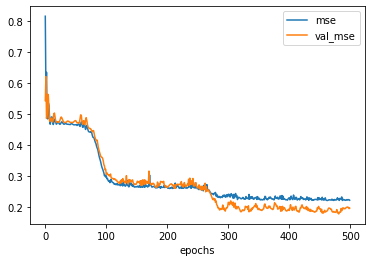

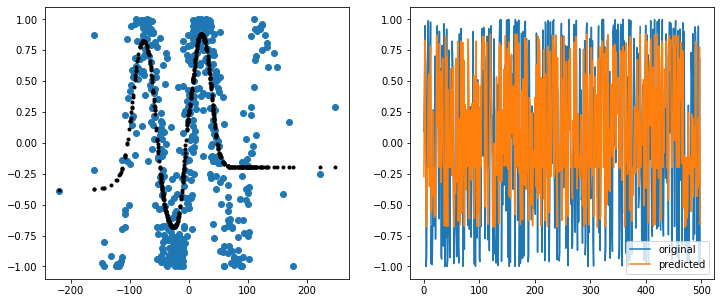

In [46]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df[['x0','x1']].values) # adapt is like fit

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=5, activation='sigmoid'),
    tf.keras.layers.Dense(units=5, activation='sigmoid'),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(df[['x0','x1']], df.y, epochs=500, \
                    batch_size=300, verbose=0, validation_split = 0.3)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

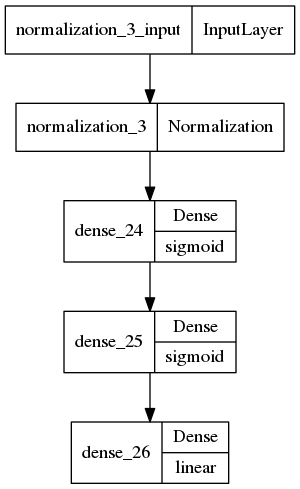

In [47]:
tf.keras.utils.plot_model(model,show_layer_activations=True)

### 6 layers neural network with sigmoid and tanh

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_39 (Dense)            (None, 10)                30        
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
 dense_42 (Dense)            (None, 10)                110       
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                     

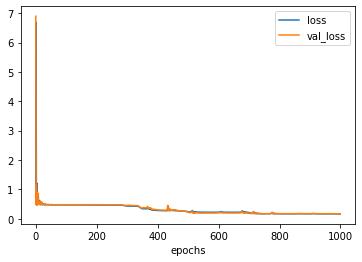

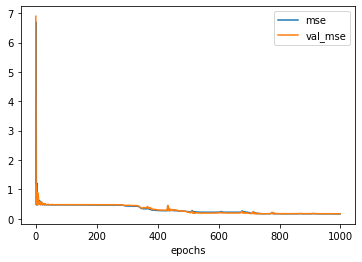

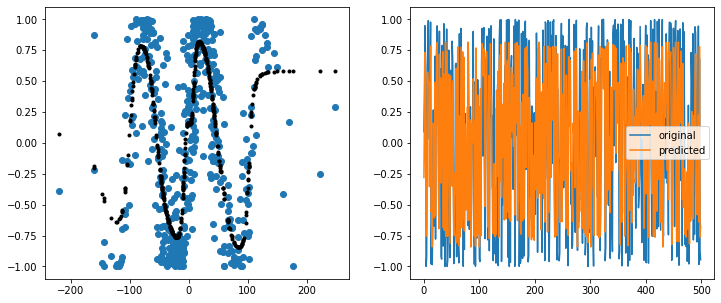

In [51]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df[['x0','x1']].values) # adapt is like fit

model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=10, activation='sigmoid'),
    tf.keras.layers.Dense(units=10, activation='tanh'),
    tf.keras.layers.Dense(units=10, activation='tanh'),
    tf.keras.layers.Dense(units=1) 
])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mse'],
    metrics=['mse']
)

history = model.fit(df[['x0','x1']], df.y, epochs=1000, \
                    batch_size=500, verbose=0, validation_split = 0.3)

history_metrics = pd.DataFrame(history.history)
history_metrics['epochs'] = history.epoch
history_metrics.plot(x='epochs',y=['loss','val_loss'])
history_metrics.plot(x='epochs',y=['mse','val_mse'])

y_hat = model.predict(df[['x0','x1']].values)

plot_regression(df.x1,df.y,y_hat)

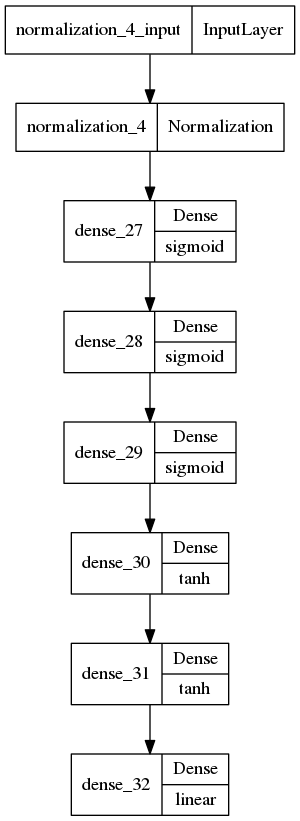

In [49]:
tf.keras.utils.plot_model(model,show_layer_activations=True)